<a href="https://colab.research.google.com/github/SunX97/communal_ops/blob/main/realworldtweetanaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas nltk seaborn matplotlib

In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re
from transformers import pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
data = pd.read_csv('/content/sample_data/twitter_dataset.csv')
data.head()
texts = data[['Text']].copy()

In [7]:
texts['LowerText'] = texts['Text'].str.lower()
texts['RemovePunc'] = texts['LowerText'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
STOPWORDS = set(stopwords.words('english'))
texts['RemoveStopwords'] = texts['RemovePunc'].apply(lambda x: ' '.join([word for word in x.split() if word not in STOPWORDS]))

In [8]:
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")
texts['Sentiment'] = texts['RemoveStopwords'].map(lambda x: sentiment_analyzer(x)[0]['label'].lower())

Device set to use cuda:0


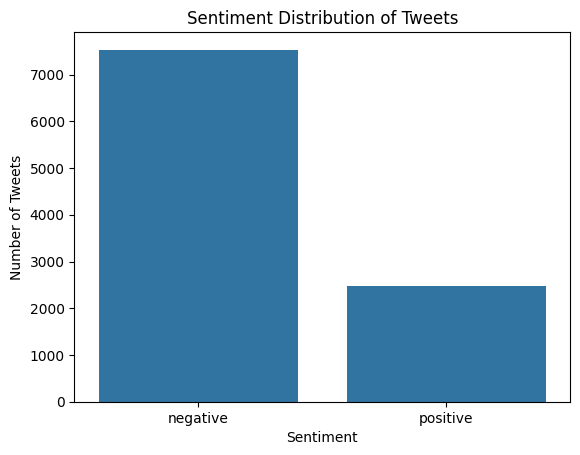

In [9]:
counter = Counter(texts['Sentiment'])
sns.barplot(x=list(counter.keys()), y=list(counter.values()))
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.title('Sentiment Distribution of Tweets')
plt.show()